In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32  # batch size
version = 0

In [2]:
!pip install -Uqq fastai

In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/MasterCourse/Car Recognizer

/content/drive/My Drive/MasterCourse/Car Recognizer


In [6]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs=bs)
dls.valid.show_batch(max_n=8, nrows=2)

In [8]:
dls.train.vocab

['bus car', 'convertible car', 'hatchback car', 'limousine car', 'micro car', 'minivan car', 'muscle car', 'sedan car', 'sports car', 'suv car', 'truck car']

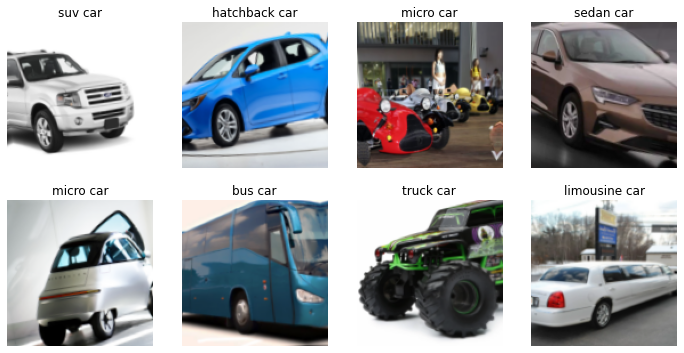

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, f"car_dataloader_v{version}.pkl")

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet50, metrics=[error_rate, accuracy])

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
path = f"car-recognizer-v{version}"
model.load(path)

In [ ]:
model.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.437469,0.272571,0.084211,0.915789,01:17


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.413628,0.357883,0.115789,0.884211,01:14
1,0.461969,0.340563,0.094737,0.905263,01:12
2,0.364335,0.307704,0.094737,0.905263,01:10


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  

In [ ]:
model.save(f"car-recognizer-v{version}")

Path('models/car-recognizer-v0.pth')

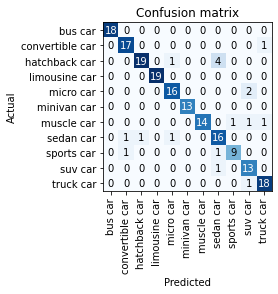

In [ ]:
intrep = ClassificationInterpretation.from_learner(model)
intrep.plot_confusion_matrix()

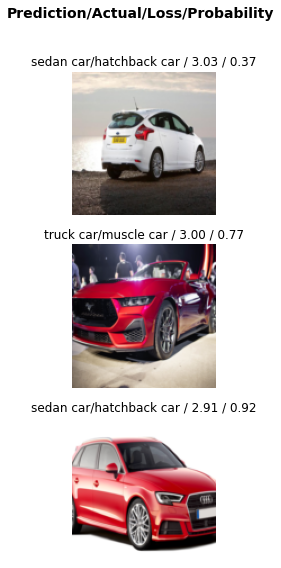

In [ ]:
intrep.plot_top_losses(range(4, 7), nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


In [ ]:
cleaner.delete()

(#7) [0,2,4,6,7,10,11]

In [ ]:
cleaner.change()

(#0) []

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")

In [ ]:
model.export(f"{model_path}/car-recognizer-v{version}.pkl")